# Week 2 Hypothesis Testing



In [1]:

# setup the presentation settings
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'serif',
              'start_slideshow_at': 'selected',
              'transition': 'fade'
})

{'start_slideshow_at': 'selected', 'theme': 'serif', 'transition': 'fade'}

# Science and Hypothesis

- Last time we talked about probability.
- But we are not gamblers. We are SCIENTISTS. We want to learn about the world we live in...
- The scientific process:
  - Hypothesize something about the world
  - devise an experiment that can falsify it
  -  and see if the hypothesis still holds

So here comes hypothesis testing...

# Science and Hypothesis (continued)

Sometimes life is easy:
-  Hypothesis: all bacteria are good
-  But then we see pathogenic e. coli
-  So it falsifies our hypothesis. Back to the drawing board...

But usually it's not that easy to falsify an hypthesis:
- Hypothesis: sick people have on average more e. coli than healthy people
- and we test 10 sick and 10 healthy people and see sick people have more e. coli
- what does it mean about our hypothesis? Is 10 people enough? 100? 100000?

We need the power of STATISTICS!

# Bayesian Approach

__Bayesian__: Given an observation X, what are the probabilities of the different hypothesis? Or sometimes, given a set of hypothesis, is there one which is one more likely than the other given the observation?

For each hypothesis $H$:

$P(H|X)=P(X|H) \cdot \frac{P(H)}{P(X)}$

And if we just want to measure which hypothesis ($H_1$ or $H_2$) is more likely, $P(X)$ cancels out and we get:

$\frac{P(H_1|X)}{P(H_2|X)}=\frac{P(H_1) \cdot P(X|H_1)}{P(H_2) \cdot P(X|H_2)}$

__The good thing:__ it is mathematically sound

__The bad thing:__ it is complicated

# Frequentist Approach

__Frequentist__: what is the probability of getting observation X under the null hypothesis $H_0$? If it is very low, we assume it is incorrect.

__Example__: Say we have a coin and we want to test if it is fair or not.

Assume we flipped the coin 20 times and observed 19 Heads. We would suspect that the coin has a bias towards giving Head vs. Tail.

__The good thing:__ it's simple

__The bad thing:__ shaky ground

(We will focus on Frequentist approach for the rest of this talk)

# Frequentist Testing process - Example continued

So what is going on?

In our mind, there are two probable options, one is that the coin is fair ($P(H)=P(T)=0.5$) and the other is that the coin has some bias towards one side vs. the other (we don't know what bias exactly or even to what side).

We can calculate the probabilities of the fair coin (exact null hypothesis).
The probability of getting the specific 20 results sequence that we got (or any other) under the fair coin hypothesis is $2^{-20}$.

This doesn't help us...

But we have some notion of an unfair coin hypothesis, and it means one side will have a higher probability than the other. And the bigger the unfairness, the bigger the difference between H and T. So we can look for example at the absolute value of the difference between heads and tails, and ask what is the probability of getting a difference of 18 or more (BTW it is <0.0001).


Note that while we explicitly use the null hypothesis, we also needed to implicitly use the alternative model to say what results are more unfair than others...


# Frequentist Testing process - the ground is shaky

Say we flip a coin 29 times and we get:

HHTHHHHHHHTTHHHHHTHTHTHHTHTTH

looks like a relatively fair coin,


but if we translate to morse code (-=H, .=T)

--. --- --- -.. -- --- .-. -. .. -. --.

which means:
Good Morning!

So is it random? what is the probability of getting this by chance?

The probability of any single set of n coin flips is $2^{-n}$, but that doesn't help us.

We need to define what results are interesting (give an order to the results).

What about morse code for German? Where do we stop?

So we need some idea of the non-null hypothesis

# Sick vs Healthy simulation

Let's construct a simple example
- There are 200 people being surveyed
  - 100 of these people are healthy and the rest are sick
- Concentrations of H pylori are measured

- Is there a difference between sick and healthy people based on H pylori concentration?


In [2]:
import warnings   # running fast and loose
warnings.simplefilter("ignore") 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu, rankdata
from statsmodels.sandbox.stats.multicomp import multipletests
from numpy.random import (normal, shuffle, permutation, 
                          exponential, uniform)

%matplotlib inline

In [3]:
np.random.seed(0)    # set seed for the random numbers

In [4]:
sick_mean    = 8
healthy_mean = 5
variance     = 2
num_sick     = 100
num_healthy  = 100
sick_data    = normal(sick_mean, variance, num_sick)
healthy_data = normal(healthy_mean, variance, num_healthy)
data = pd.DataFrame({'group': ['sick']*num_sick + ['healthy']*num_healthy,
                     'H pylori': np.concatenate((sick_data, healthy_data))})

In [5]:
data.head(n=4)

,H pylori,group
0,11.528105,sick
1,8.800314,sick
2,9.957476,sick
3,12.481786,sick


In [6]:
data.tail(n=4)

,H pylori,group
196,6.543581,healthy
197,6.647008,healthy
198,9.326472,healthy
199,7.673056,healthy


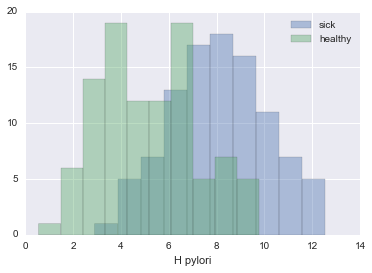

In [7]:
# Plot H pylori distribution for the sick group
sns.distplot(data.loc[data.group=='sick', 'H pylori'],     
             label='sick', kde=False, bins=10)
# Plot H pylori distribution for the healthy group
sns.distplot(data.loc[data.group=='healthy', 'H pylori'],
             label='healthy', kde=False, bins=10)
plt.legend()

Our hypothesis is that the sick and healthy distributions have different means.

More precisely:

$H_a: \mu_H \neq \mu_S$

(H = Healthy, S = Sick)

From our hypothese $H_a$, we can generate the opposite null hypothesis $H_0$, which is that the sick and healthy have the same means:

$H_0: \mu_H= \mu_S$

And now we can calculate what is the probability (p-value) of getting such or more extreme results under the null hypothesis


# What's the outcome


we get a p-value.

what does it mean? 

The p-value is the probability of getting such a result or more extreme under the null hypothesis ($H_0$). If it is very low, we would like to __reject__ the null hypothesis (say it is incorrect), and therefore the alternative hypothesis $H_a$ is correct


Note that a (relatively) high p-value does not indicate that the null hypothesis is true. just that we cannot rule it out (i.e. one coin toss). Especially since our $H_a$ model is not well defined.


Another question that comes to mind is what cutoff should we take?

Below what p-value can we say the null hypothesis is incorrect?

And the answer is:

0.05! 

(the exact number is 0.042)

# False positive and false negative errors

__False positive__ (type 1 error) - we reject the null hypothesis when in reality it is correct

$\alpha = P(reject\; H_0\; |\; H_0\; is\; True)$

__False negative__ (type 2 error) - we don't reject the null hypothesis when in reality it is incorrect

$\beta = P(don't\; reject\; H_0\; |\; H_a\; is\; True)$


<img src="files/type-i-and-type-ii-errors.jpg" style="height: 400px;">

# Some hypothesis selection methods
__If we don't want to have any false positives:__


Always accept $H_0$  

$\alpha=0$ -> No Type I errors


__If we don't want to make any false negatives:__


Always reject $H_0$  

$\beta=0$ -> No Type II errors


__The frequentist approach:__
    
controls the Type I error, but offers little control over Type II error

# Sick vs healthy example (continued)

$H_a: \mu_H \neq \mu_S$  The means between sick and healthy are different

$H_0: \mu_H= \mu_S$ The means are the same

p-value = the probability we acknowledge that sick and healthy are different given that they are the same

We will use the [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test) to estimate this probability
    

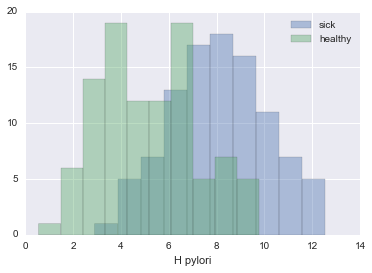

In [8]:
# Plot H pylori distribution for the sick group
sns.distplot(data.loc[data.group=='sick', 'H pylori'],     
             label='sick', kde=False, bins=10)
# Plot H pylori distribution for the healthy group
sns.distplot(data.loc[data.group=='healthy', 'H pylori'],
             label='healthy', kde=False, bins=10)
plt.legend()

In [9]:
t, pvalue = ttest_ind(data.loc[data.group=='sick', 'H pylori'],
                      data.loc[data.group=='healthy', 'H pylori'])

In [10]:
t

10.179745677305018

In [11]:
pvalue

7.6431617406052428e-20

# Mann-Whitney U-test
A non-parametric test. Meaning the distribution of the data does not matter.

__The good stuff:__ We can use it on whatever data we have (even microbiome) and the false positive error rate is guaranteed to be controlled by the p-value.

__The bad stuff:__ It has less power than the parametric tests (i.e. t-test)

See [here](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) for more details.

In [12]:
u, pvalue = mannwhitneyu(data.loc[data.group=='sick', 'H pylori'],
                         data.loc[data.group=='healthy', 'H pylori'])

In [13]:
u

1623.0

In [14]:
pvalue

7.9129312462118361e-17

# Permutation Test
We select whatever measure we want on our data and calculate it.

Then we randomly permute the labels of our samples lots of times, and for each permutation calculate the measure.
(This corresponds to the measure under the null hypothesis)

By looking at the fraction of times we got such an extreme measure (as in our real data or bigger) in the permuted data, we can calculate the p-value

__The good stuff:__ Can do it on whatever measure we want. Don't have any assumptions (except independence between samples).

__The bad stuff:__ less power (non-parametric), can take a lot of time to calculate the permutations.

In [15]:
def permutation_test(df1, num_permutations=999):
    # calculate a permutation test based on the t-test statistic
    df=df1.copy()
    ts = np.zeros(num_permutations)
    t,p = ttest_ind(df.loc[df.group=='sick', 'H pylori'],
                          df.loc[df.group=='healthy', 'H pylori'])
    for i in range(num_permutations):
        df['group'] = np.random.permutation(df.group)
        t_,p = ttest_ind(df.loc[df.group=='sick', 'H pylori'],
                               df.loc[df.group=='healthy', 'H pylori'])
        ts[i] = np.abs(t_)
    pvalue = (1 + (ts >= t).sum() )/ (num_permutations + 1)
    return t,ts,pvalue

In [16]:
realstat,randomstats,pvalue = permutation_test(data)

In [17]:
t

10.179745677305018

In [18]:
randomstats[:10]

array([ 0.62898217,  0.86784998,  0.82505093,  0.16481799,  0.5310986 ,
        0.57711571,  1.03243389,  1.1203099 ,  0.24558832,  0.56398787])

In [19]:
pvalue

0.001

# Important message
Note that for most tests, we assume __independece between the samples__ (for the null hypothesis).

If samples are not independent, special care must be taken (even when using permutation based tests)

## Example 1
We flip a coin and replicate the result 20 times. We observe 20 heads. What is the probability that the coin is fair?

## Example 2
In a microbiome experiment, we have a treatment group and a control group (each 10 individuals). at time 0 we give the treatment group some treatment, and then we take samples from both groups every day for a month. We want to see what bacteria change.

Even if we assume the effect of the treatment is immediate and constant, we cannot just compare the means of the treatment and control group!


# Effect size and p-values
While we need p-values to be signifcant, once they reach our desired threshold, the exact p-value is not the important thing. This is because:

1. What we care about it the biological effect. We can have a 0.1% difference in some bacteria level between healthy and sick which is very significant, but a 0.1% difference is not really important...
2. p-values are very sensitive and don't repeat very well, so their order can be random.
3. The p-value depends on the number of samples. If we had infinite samples, probably all bacteria would be significantly different between sick and healthy, but this does not mean they are interesting.

So instead of looking at p-values, we should look at the biologal effect size (such as the difference or ration between the sick and healthy).

The p-value just assures us what we are seeing is not due to chance.

# Effect size example

In [20]:
np.random.seed(0)    # set seed for the random numbers

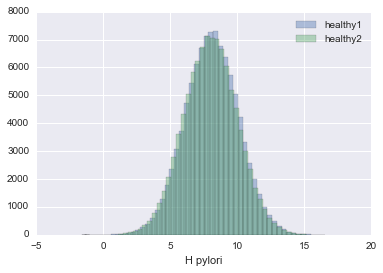

In [23]:
n = 100000
data = pd.DataFrame({'group': ['healthy1']*n + ['healthy2']*n,
                     'H pylori': np.concatenate((normal(8.1, 2, n),
                                                 normal(8, 2, n)))})

sns.distplot(data.loc[data.group=='healthy1', 'H pylori'],  # H pylori values for the sick group
             label='healthy1', kde=False)
sns.distplot(data.loc[data.group=='healthy2', 'H pylori'],  # H pylori values for the healthy group
             label='healthy2', kde=False)
plt.legend()

In [ ]:
t, pvalue = ttest_ind(data.loc[data.group=='healthy1', 'H pylori'],
                      data.loc[data.group=='healthy2', 'H pylori'])

In [21]:
t

10.4146543383201

In [22]:
pvalue

2.1577457502909888e-25

# Effect size and power - another example

pvalue 5.38869725701e-19


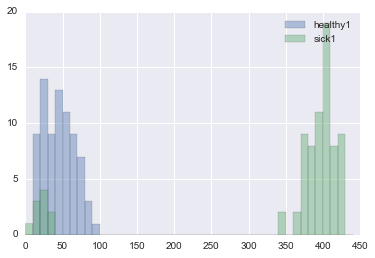

In [24]:
# big effect size, small pvalues
n_many = 70
n_few = 10

H1 = np.concatenate((normal(50, 20, size=n_many),
                     normal(10, 20, size=n_few)))
S1 = np.concatenate((normal(400, 20, size=n_many),
                     normal(20, 20, size=n_few)))

print('pvalue', mannwhitneyu(H1, S1).pvalue)
sns.distplot(H1, label='healthy1', kde=False, bins=np.arange(0,450,10))
sns.distplot(S1, label='sick1', kde=False, bins=np.arange(0,450,10))
plt.legend()

pvalue 4.69291355033e-28


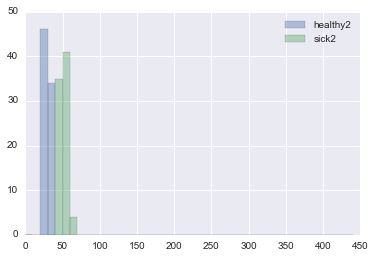

In [25]:
# small effect size, big pvalues
H2 = np.concatenate((normal(30, 2, n_many),
                     normal(35, 2, n_few)))
S2 = np.concatenate((normal(50, 2, n_many),
                     normal(60, 2, n_few)))
print('pvalue', mannwhitneyu(H2, S2).pvalue)

sns.distplot(H2, label='healthy2', kde=False, bins=np.arange(0,450,10))
sns.distplot(S2, label='sick2', kde=False, bins=np.arange(0,450,10))
plt.legend()

# Normality assumption problem

In [ ]:
np.random.seed(0)    # set seed for the random numbers

In [26]:
data = pd.DataFrame({'group': ['sick']*100 + ['healthy']*100,
                     'H pylori': np.concatenate((normal(8, 2, 100),
                                                 exponential(7, 100)))})

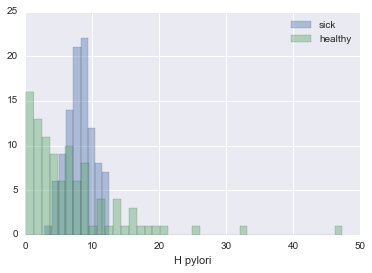

In [27]:
sns.distplot(data.loc[data.group=='sick', 'H pylori'],
             label='sick', kde=False)
sns.distplot(data.loc[data.group=='healthy', 'H pylori'], 
             label='healthy', kde=False, bins=40)
plt.legend()

In [28]:
t, pvalue = ttest_ind(data.loc[data.group=='sick', 'H pylori'],
                      data.loc[data.group=='healthy', 'H pylori'])

In [29]:
t

1.7283048631832336

In [30]:
pvalue

0.085492566172262571

# Normality assumption - Mann Whitney U-test

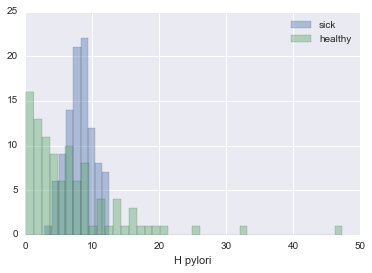

In [31]:
sns.distplot(data.loc[data.group=='sick', 'H pylori'],
             label='sick', kde=False)
sns.distplot(data.loc[data.group=='healthy', 'H pylori'], 
             label='healthy', kde=False, bins=40)
plt.legend()

In [32]:
u, pvalue = mannwhitneyu(data.loc[data.group=='sick', 'H pylori'],
                         data.loc[data.group=='healthy', 'H pylori'])

In [33]:
u

3142.0

In [34]:
pvalue

2.8315160121805506e-06

# Multiple hypothesis testing problem
A p-value of 0.05 for the null hypothesis means we will get such a significant result under the null hypothesis in 0.05 of the cases

So if we do the test multiple times (say 100), it means that in 5 times out of the 100 the null hypothesis will be rejected and we will have false positives.

When we look at a typical microbiome experiment, we have order of 1000 bacteria for which we want to test if they are different between sick and H

Even if all bacteria are not different (the null hypothesis holds for all of them), if we just take the 0.05 p-value cutoff, we will reject 50 of bacteria and say they are different (and if we will look at their distribution, they will be convincing!)

# Multiple hypothesis testing example
## Generate the random data (same mean for both groups)

In [35]:
num_healthy = 100
num_sick = 100
num_samples = num_healthy + num_sick
num_otus = 1000

np.random.seed(0)    # set seed for the random numbers

# generate non random data
otu_ids = np.arange(num_otus)  # simulated OTU ids

# randomly grab 200 values uniformly distributed between (0, 10) for each OTU
random_data = pd.DataFrame({i: normal(7, 3, size=num_samples) for i in otu_ids})
random_data['group'] = ['healthy'] * num_healthy + ['sick'] * num_sick

In [36]:
# calculate the p-value for each bacteria
stats = pd.DataFrame(index=otu_ids)
for i in otu_ids:
    t, pvalue = mannwhitneyu(random_data.loc[random_data.group=='sick', i],
                             random_data.loc[random_data.group=='healthy', i])
    stats.loc[i, 't'] = t
    stats.loc[i, 'pvalue'] = pvalue

## Resulting p-values

In [37]:
stats.sort_values(by='pvalue').head()

,t,pvalue
401,3648.0,0.000480
202,3732.0,0.000977
205,3799.0,0.001677
572,3823.0,0.002022
92,3835.0,0.002218


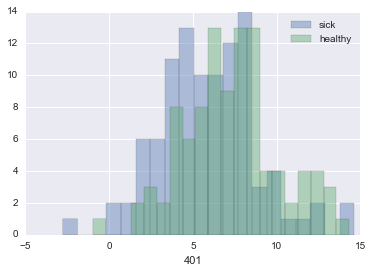

In [38]:
# look at the most significant OTU
max_otu = stats.pvalue.argmin()
sns.distplot(random_data.loc[random_data.group=='sick', max_otu],
             label='sick', kde=False, bins=20)
sns.distplot(random_data.loc[random_data.group=='healthy', max_otu], 
             label='healthy', kde=False, bins=20)
plt.legend()

Just by chance, there is a high chance that there are OTUs significantly different between the 2 groups.

In [39]:
# create a dataset with a real difference between sick and healthy
num_healthy  = 50
num_sick     = 50
healthy_mean = 8
sick_mean    = 7
variance     = 2

healthy_data = pd.DataFrame({i: normal(healthy_mean, variance, size=num_healthy) 
                             for i in otu_ids})
sick_data = pd.DataFrame({i: normal(sick_mean, variance, size=num_sick) 
                          for i in otu_ids})

data = pd.concat((healthy_data, sick_data))
data['group'] = ['healthy'] * num_healthy + ['sick'] * num_sick

In [40]:
realstats = pd.DataFrame(index=otu_ids)
for i in otu_ids:
    t, pvalue = mannwhitneyu(data.loc[data.group=='sick', i],
                             data.loc[data.group=='healthy', i])
    realstats.loc[i, 't'] = t
    realstats.loc[i, 'pvalue'] = pvalue

# So what can we do?
We cannot change the p-values!

But we can change the threshold $\alpha$ defining when we reject the null hypothesis


# Bonferroni Correction
given a threshold $\alpha$ for rejecting the null hypothesis for a single bacteria, we define a new threshold for rejection when doing the test on $n$ bacteria by:

$\alpha'=\frac{\alpha}{n} $

and reject the null hypothesis based on the new $\alpha'$

This controls the Family Wise Error Rate (FWER) to $\alpha$, meaning the probability that we made at least one false rejection is lower than $\alpha$

The good thing is we do not need to assume independence between the bacteria

But we pay a big price in the power!

# Bonferroni correction - example

In [41]:
reject, corrected_pvals, sidak, bonf = multipletests(stats.pvalue)
stats['corrected pvalue'] = corrected_pvals
stats.sort_values(by='pvalue').head()

,t,pvalue,corrected pvalue
401,3648.0,0.000480,0.381028
202,3732.0,0.000977,0.623548
205,3799.0,0.001677,0.812694
572,3823.0,0.002022,0.867128
92,3835.0,0.002218,0.890505


In [42]:
# random data
num_rejects=np.sum(stats.pvalue<=0.05)
reject, corrected_pvals, sidak, bonf = multipletests(stats.pvalue)
num_bonf_rejects=np.sum(corrected_pvals<=0.05)
print('before Bonferroni correction: %d' % num_rejects)
print('after Bonferroni correction: %d' % num_bonf_rejects)

before Bonferroni correction: 96
after Bonferroni correction: 0


In [43]:
# real difference data
num_rejects=np.sum(realstats.pvalue<=0.05)
reject, corrected_pvals, sidak, bonf = multipletests(realstats.pvalue)
num_bonf_rejects=np.sum(corrected_pvals<=0.05)
print('before Bonferroni correction: %d' % num_rejects)
print('after Bonferroni correction: %d' % num_bonf_rejects)



before Bonferroni correction: 773
after Bonferroni correction: 58


# False Discovery Rate control (FDR)
Sometimes we don't mind making mistakes, as long as we don't make too many.

If we relax our restriction (that with very high probability all rejects are correct) and instead require only that the fraction of false rejects will be small, we can have more power.

Testing with a given FDR value $q$ means:
$\frac{\text{number of false rejections}}{\text{total rejections}}\leq q$

And using FDR methods (such as Benjamini-Hochberg) we can find the p-value cutoff that guarantees controlling the FDR.

The good thing: this cutoff is usually much higher than Bonferroni


# FDR (Benjamini-Hochberg) example

In [44]:
# random data
num_rejects=np.sum(stats.pvalue<=0.05)
reject,a,b,c = multipletests(stats.pvalue,method = 'fdr_bh')
num_fdr_rejects=np.sum(reject==True)
print('before FDR-BH correction: %d' % num_rejects)
print('after FDR-BH correction: %d' % num_fdr_rejects)


before FDR-BH correction: 96
after FDR-BH correction: 0


In [45]:
# real difference data
num_rejects=np.sum(realstats.pvalue<=0.05)
reject,a,b,c = multipletests(realstats.pvalue,method = 'fdr_bh')
num_fdr_rejects=np.sum(reject==True)
print('before FDR-BH correction: %d' % num_rejects)
print('after FDR-BH correction: %d' % num_fdr_rejects)
print('(after Bonferroni correction it was: %d)' % num_bonf_rejects)

before FDR-BH correction: 773
after FDR-BH correction: 728
(after Bonferroni correction it was: 58)


# Compositionality problem

In [46]:
num_healthy = 100
num_sick = 100
num_samples = num_healthy + num_sick
num_otus = 1000
data = pd.DataFrame({i: uniform(low=0.0, high=10.0, size=num_samples) 
                     for i in otu_ids})

# Simulate a bloom.  OTU0 increases by a factor of 10 at each sample
data.loc[:, 0] = np.arange(num_samples) * 10

# normalize down to proportions.  
#See week1.sample.ipynb for further explanation.
data = data.apply(lambda x : x/x.sum(), axis=1)

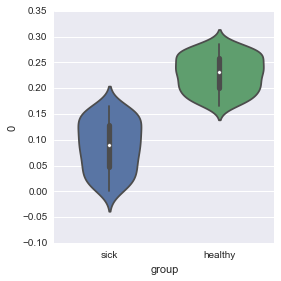

In [47]:
groups = pd.Series(['sick']*num_sick + ['healthy']*num_healthy)
data['group'] = groups
sns.factorplot(x='group', y=0, data=data, kind='violin')

In [48]:
stats = pd.DataFrame(index=otu_ids)
for i in otu_ids:
    t, pvalue = ttest_ind(data.loc[data.group=='sick', i],
                          data.loc[data.group=='healthy', i])
    stats.loc[i, 't'] = t
    stats.loc[i, 'pvalue'] = pvalue

# Multiple hypothesis tests
reject, pvals, sidak, bonf = multipletests(stats.pvalue)
stats['corrected pvalue'] = pvals


In [49]:
stats.sort_values(by='pvalue').head()    

,t,pvalue,corrected pvalue
0,-23.593920,1.950286e-59,0.000000
401,5.109459,7.578950e-07,0.000757
114,5.091954,8.224364e-07,0.000820
25,4.881258,2.165406e-06,0.002157
251,4.843068,2.572688e-06,0.002559


The main take away.  Every statistical test has its own set of assumptions. 

Other tests
- ANOVA
- Kruskal Wallis test
- Kolmogorov Smirnov test
- Many many others